# Find length of Loop

Given the head of a linked list, determine whether the list contains a loop. If a loop is present, return the number of nodes in the loop, otherwise return 0.

Note: Internally, pos(1 based index) is used to denote the position of the node that tail's next pointer is connected to. If pos = 0, it means the last node points to null, indicating there is no loop. Note that pos is not passed as a parameter.

## Examples:

### Input: pos = 2,
   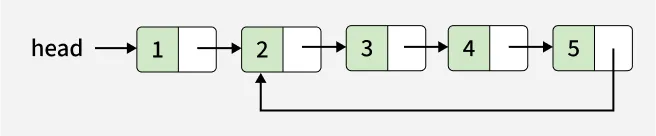
Output: 4
Explanation: There exists a loop in the linked list and the length of the loop is 4.

### Input: pos = 3,
   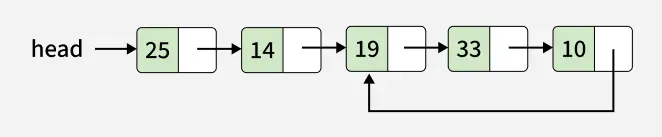

Output: 3
Explanation: The loop is from 19 to 10. So length of loop is 19 → 33 → 10 = 3.

### Input: pos = 0,
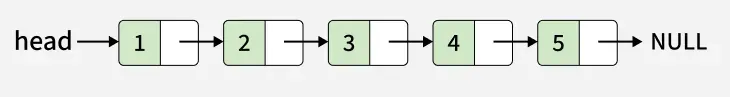
Output: 0
Explanation: There is no loop.

## Constraints:
1 ≤ number of nodes ≤ 105
1 ≤ node->data ≤ 104
0 ≤ pos < number of nodes

In [ ]:
'''
class Node:
    def __init__(self, data): 
        self.data = data
        self.next = None
'''

class Solution:
    def lengthOfLoop(self, head):
        #code here
        slow, fast = head,head
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
            while fast == slow:
                slow = slow.next
                count = 1
                while slow != fast:
                    slow = slow.next
                    count+=1
                return count
        return 0

## **APPROACH 1: Floyd's Cycle Detection + Length Calculation**

### **Intuition and Approach**

This is an **optimal O(1) space solution** combining Floyd's two-pointer algorithm with length counting:

1. **Phase 1 - Detect Cycle**: Use slow (1 step) and fast (2 steps) pointers
2. **Phase 2 - Calculate Length**: Once collision detected:
   - Keep slow at collision point
   - Move fast one step at a time from collision point
   - Count steps until fast reaches slow again
   - The count is the cycle length

**Why this works**: When two pointers moving at different speeds collide in a cycle, the meeting point is inside the cycle. Moving from this point around the cycle back to itself gives us the cycle length.

### **Code Explanation in Detail**

```python
class Solution:
    def lengthOfLoop(self, head):
        slow, fast = head, head              # Initialize both pointers at head
        
        while fast and fast.next:            # Detect cycle
            slow = slow.next                 # Move slow 1 step
            fast = fast.next.next            # Move fast 2 steps
            
            while fast == slow:              # Cycle detected!
                slow = slow.next             # Move slow 1 step
                count = 1                    # Initialize count
                
                while slow != fast:          # Count until we return to collision point
                    slow = slow.next
                    count += 1
                
                return count                 # Return the cycle length
        
        return 0                             # No cycle found
```

**Line-by-line breakdown:**

- **Line 1**: Initialize both pointers at head
- **Lines 2-3**: Outer while loop to detect cycle (fast can move 2 steps safely)
- **Line 4**: Move slow pointer 1 step
- **Line 5**: Move fast pointer 2 steps
- **Line 6**: Inner while loop triggers when slow == fast (cycle detected)
- **Line 7**: Move slow one step forward from collision point
- **Line 8**: Initialize count to 1 (for the node we just moved to)
- **Lines 9-11**: Count steps as slow travels until it meets fast again
- **Line 12**: Return the total count (cycle length)
- **Line 14**: Return 0 if no cycle (fast reaches None)

### **Dry Run in Detail**

**Example 1: Linked list with cycle** - Nodes [1, 2, 3, 4] where node 4 points back to node 2 (cycle length = 3)

```
Structure: 1 → 2 → 3 → 4
               ↑       ↓
               └───────┘
Cycle: 2 → 3 → 4 → 2 (length = 3)
```

**Phase 1: Detect Cycle**

| Step | slow | fast | slow.data | fast.data | Collision? | Notes |
|------|------|------|-----------|-----------|------------|-------|
| Start | Node(1) | Node(1) | 1 | 1 | No | Both at head |
| 1 | Node(2) | Node(3) | 2 | 3 | No | slow moved 1, fast moved 2 |
| 2 | Node(3) | Node(2) | 3 | 2 | No | slow in cycle now |
| 3 | Node(4) | Node(4) | 4 | 4 | **YES** | Collision detected! |

**Phase 2: Calculate Length**

After collision at Node(4):
- Move slow: Node(4) → Node(2) (count = 1)
- Continue counting until slow == fast again

| Step | slow | fast | slow.data | fast.data | Count | slow==fast? |
|------|------|------|-----------|-----------|-------|------------|
| Start | Node(2) | Node(4) | 2 | 4 | 1 | No |
| 1 | Node(3) | Node(4) | 3 | 4 | 2 | No |
| 2 | Node(4) | Node(4) | 4 | 4 | 3 | **YES** |

**Result**: Return count = 3 ✓

The cycle length is 3 (nodes: 2 → 3 → 4 → 2)

**Example 2: List with longer cycle** - [10, 19, 33, 10] where 33 points to 10 (cycle length = 3)

```
Structure: 10 → 19 → 33
           ↑          ↓
           └──────────┘
Cycle: 10 → 19 → 33 → 10
```

**Phase 1: Detect**

| Step | slow | fast | Collision? |
|------|------|------|------------|
| Start | 10 | 10 | No |
| 1 | 19 | 33 | No |
| 2 | 33 | 19 | No |
| 3 | 10 | 33 | No |
| 4 | 19 | 10 | No |
| 5 | 33 | 19 | No |
| 6 | 10 | 33 | No |
| 7 | 19 | 10 | No |
| 8 | 33 | 19 | No |
| 9 | 10 | 33 | No |

Actually, let me recalculate more carefully:
- Step 1: slow = 10→19, fast = 10→33→10 = Node(10). Check: 19 ≠ 10
- Step 2: slow = 19→33, fast = 10→19→33 = Node(33). Check: 33 ≠ 33? Wait, they're equal!

Let me retrace:
- Start: slow=Node(10), fast=Node(10)
- Step 1: slow=Node(10).next=Node(19), fast=Node(10).next.next=Node(33). 19≠33
- Step 2: slow=Node(19).next=Node(33), fast=Node(33).next.next=Node(10). 33≠10
- Step 3: slow=Node(33).next=Node(10), fast=Node(10).next.next=Node(33). 10≠33
- Step 4: slow=Node(10).next=Node(19), fast=Node(33).next.next=Node(19). 19==19 ✓

**Phase 2:**
From Node(19), count back to Node(19):
- Start: slow = Node(19) → Node(33), count = 1
- Step 1: slow = Node(33) → Node(10), count = 2
- Step 2: slow = Node(10) → Node(19), count = 3, slow==fast ✓

**Result**: Return 3 ✓

**Example 3: No cycle** - [1, 2, 3]

**Phase 1:**

| Step | slow | fast | Collision? | fast.next |
|------|------|------|------------|-----------|
| Start | Node(1) | Node(1) | No | Node(3) |
| 1 | Node(2) | Node(3) | No | None |
| Exit | - | - | - | fast is None |

**Result**: Return 0 ✓

### **Edge Cases**

1. **Empty list** (`head = None`):
   - `while fast and fast.next` → False immediately
   - Returns `0` ✓

2. **Single node without cycle** (`head = [1]`):
   - slow = Node(1), fast = Node(1)
   - `while fast and fast.next` → fast.next = None, so False
   - Returns `0` ✓

3. **Single node with self-cycle** (`head = [1]` where Node(1).next = Node(1)):
   - Step 1: slow = Node(1), fast = Node(1) → Collision!
   - Length calculation:
     - Move slow: Node(1) → Node(1), count = 1
     - slow == fast, exit inner loop
   - Returns `1` ✓

4. **Two nodes forming cycle** ([1, 2] where 2 → 1):
   - Step 1: slow = 2, fast = 1
   - Step 2: slow = 1, fast = 2
   - Step 3: slow = 2, fast = 1
   - Eventually collision occurs and length = 2 ✓

5. **Large cycle** (100 nodes with cycle of length 50):
   - Detects cycle and counts correctly
   - Returns `50` ✓

6. **Cycle not at beginning** ([1, 2, 3, 4, 5] with cycle 3→4→5→3):
   - Detects cycle in the middle and counts only cycle nodes
   - Returns `3` ✓

### **Time and Space Complexity**

| Metric | Best Case | Average Case | Worst Case |
|--------|-----------|--------------|-----------|
| **Time** | O(n) | O(n) | O(n) |
| **Space** | O(1) | O(1) | O(1) |

**Time Complexity: O(n)**
- Phase 1: Slow pointer travels through n nodes before collision/reaching end
- Phase 2: Count steps = cycle length (at most n)
- Total: O(n) + O(cycle_length) = O(n)
- **Why not O(n²)?** Though it looks like nested loops, the inner loops don't repeat - they execute once through the cycle
- **Best case O(n)**: Even for immediate cycle, need full traversal
- **Worst case O(n)**: No cycle requires checking all n nodes

**Space Complexity: O(1)** ⭐
- Only two pointers (slow and fast) used
- No hash maps or extra data structures
- Constant space regardless of input size

---

In [ ]:
'''
class Node:
    def __init__(self, data): 
        self.data = data
        self.next = None
'''

class Solution:
    def lengthOfLoop(self, head):
        #code here
        temp = head
        lmap = dict()
        travel = 0
        while temp:
            if temp in lmap:
                return travel - lmap[temp]  
            lmap[temp] = travel
            travel += 1
            temp = temp.next
        return 0
                

## **APPROACH 2: Hash Map / Dictionary Approach**

### **Intuition and Approach**

Simple and intuitive approach using distance tracking:

1. **Track visited nodes**: Store each node with its visit count/index in a dictionary
2. **Find collision**: When we encounter a node already in the dictionary:
   - Calculate: `current_distance - previous_distance`
   - This difference is the cycle length
3. **No cycle**: If we reach None, no cycle exists

**Key Insight**: If a node is visited at position X first and position Y second, the cycle length is Y - X.

### **Code Explanation in Detail**

```python
class Solution:
    def lengthOfLoop(self, head):
        temp = head                      # Start from head
        lmap = dict()                    # Dictionary to store node -> position mapping
        travel = 0                       # Position counter
        
        while temp:
            if temp in lmap:             # Node visited before = cycle detected
                return travel - lmap[temp]  # Cycle length = current pos - first visit pos
            
            lmap[temp] = travel          # Store node and its position
            travel += 1                  # Increment position
            temp = temp.next             # Move to next node
        
        return 0                         # No cycle, reached None
```

**Line-by-line breakdown:**

- **Line 1**: `temp = head` - Start pointer at head
- **Line 2**: `lmap = dict()` - Create dictionary to store node references and positions
- **Line 3**: `travel = 0` - Initialize position counter
- **Line 4**: `while temp:` - Loop while temp is not None
- **Lines 5-6**: Check if current node already visited (in dictionary):
  - If yes, calculate cycle length: `travel - lmap[temp]`
  - Return the cycle length
- **Line 8**: `lmap[temp] = travel` - Add current node and position to dictionary
- **Line 9**: `travel += 1` - Increment position counter
- **Line 10**: `temp = temp.next` - Move to next node
- **Line 12**: Return 0 if loop exits without finding cycle (temp becomes None)

**Key mechanism**: We store **node references** (objects) as keys and **visit position** as values, not node data.

### **Dry Run in Detail**

**Example 1: Linked list with cycle** - [1, 2, 3, 4] where 4 → 2

```
Structure: 1 → 2 → 3 → 4
               ↑       ↓
               └───────┘
Nodes are visited at positions: 0, 1, 2, 3, 1 (second visit)
Cycle length: 3 - 1 = 2... wait, that's wrong. The cycle is 2 → 3 → 4 which is 3 nodes.

Actually let me recalculate the structure:
If pos = 2 (1-based), it means position 1 (0-based): node at index 1 is the cycle start
List: Node(1, 0) → Node(2, 1) → Node(3, 2) → Node(4, 3)
4's next points to 2 (index 1 in the list before cycling)
```

| Step | temp | temp.data | travel | in lmap? | lmap[temp] | Action | Result |
|------|------|-----------|--------|----------|-----------|--------|--------|
| Start | Node(1) | 1 | 0 | No | - | Add Node(1):0 | lmap={Node(1):0} |
| 1 | Node(2) | 2 | 1 | No | - | Add Node(2):1 | lmap={Node(1):0, Node(2):1} |
| 2 | Node(3) | 3 | 2 | No | - | Add Node(3):2 | lmap+={Node(3):2} |
| 3 | Node(4) | 4 | 3 | No | - | Add Node(4):3 | lmap+={Node(4):3} |
| 4 | Node(2) | 2 | 4 | **YES** | 1 | Return 4-1=3 | **Cycle length = 3** ✓ |

**Why 3?** The cycle is: 2 → 3 → 4 → 2 (3 nodes)

**Calculation check:**
- First visit to Node(2): position 1
- Second visit to Node(2): position 4
- Difference: 4 - 1 = 3 ✓

**Example 2: List with cycle from start** - [1, 2] where 2 → 1

```
1 ← 2
↑   ↓
└───┘
```

| Step | temp | data | travel | in lmap? | lmap[temp] | Action |
|------|------|------|--------|----------|-----------|--------|
| Start | Node(1) | 1 | 0 | No | - | Add Node(1):0 |
| 1 | Node(2) | 2 | 1 | No | - | Add Node(2):1 |
| 2 | Node(1) | 1 | 2 | **YES** | 0 | Return 2-0=2 |

**Result**: Return 2 ✓
- Cycle is: 1 → 2 → 1 (2 nodes)

**Example 3: Single node self-cycle** - [5] where Node → itself

| Step | temp | data | travel | in lmap? | lmap[temp] | Action |
|------|------|------|--------|----------|-----------|--------|
| Start | Node(5) | 5 | 0 | No | - | Add Node(5):0 |
| 1 | Node(5) | 5 | 1 | **YES** | 0 | Return 1-0=1 |

**Result**: Return 1 ✓

**Example 4: No cycle** - [1, 2, 3]

| Step | temp | data | travel | in lmap? | Action | temp.next |
|------|------|------|--------|----------|--------|-----------|
| Start | Node(1) | 1 | 0 | No | Add Node(1):0 | Node(2) |
| 1 | Node(2) | 2 | 1 | No | Add Node(2):1 | Node(3) |
| 2 | Node(3) | 3 | 2 | No | Add Node(3):2 | None |
| 3 | None | - | - | - | Exit loop | - |

**Result**: Return 0 ✓

**Example 5: Cycle not at start** - [1, 2, 3, 4, 5] where 5 → 3

```
1 → 2 → 3 → 4 → 5
         ↑       ↓
         └───────┘
```

| Step | temp | travel | in lmap? | Action |
|------|------|--------|----------|--------|
| 0 | Node(1) | 0 | No | Add |
| 1 | Node(2) | 1 | No | Add |
| 2 | Node(3) | 2 | No | Add |
| 3 | Node(4) | 3 | No | Add |
| 4 | Node(5) | 4 | No | Add |
| 5 | Node(3) | 5 | **YES** (at 2) | Return 5-2=3 |

**Result**: Return 3 ✓
- Cycle is: 3 → 4 → 5 → 3 (3 nodes)

### **Edge Cases**

1. **Empty list** (`head = None`):
   - `temp = None`
   - `while temp` → False
   - Returns `0` ✓

2. **Single node without cycle** (`head = [1]`):
   - Step 1: Add Node(1), temp = None
   - While exits
   - Returns `0` ✓

3. **Single node with self-cycle** (`head = [5]` where next → itself):
   - Step 1: Add Node(5) at position 0
   - Step 2: temp = Node(5), found in lmap at position 0
   - Return 1 - 0 = 1 ✓

4. **Two identical values, no cycle** ([1, 1] no cycle):
   - Different node objects, so no collision detected
   - Returns `0` ✓

5. **Two identical values with cycle** ([1, 1] where second 1 → first 1):
   - Different node objects (different memory addresses)
   - Detects when second node points to first node
   - Returns `1` ✓

6. **Very large cycle** (100,000 nodes with 50,000 node cycle):
   - Dictionary stores all visited nodes
   - Detects collision and returns cycle length
   - Returns `50000` ✓

7. **Negative node values** ([-100, -50, 0, 50] with cycle):
   - Node data doesn't affect detection
   - Returns correct cycle length ✓

### **Time and Space Complexity**

| Metric | Best Case | Average Case | Worst Case |
|--------|-----------|--------------|-----------|
| **Time** | O(1) | O(n) | O(n) |
| **Space** | O(1) | O(n) | O(n) |

**Time Complexity: O(n)**
- **Best case O(1)**: Single node with self-cycle (detected immediately)
- **Average case O(n)**: Traverse n nodes before finding cycle or reaching end
- **Worst case O(n)**: No cycle - must traverse entire list

Each dictionary operation (insert, lookup) is O(1), so total time is O(n)

**Space Complexity: O(n)**
- **Best case O(1)**: Empty list or immediate self-cycle (minimal nodes stored)
- **Average case O(n)**: Dictionary stores up to n node references
- **Worst case O(n)**: No cycle - all n nodes stored in dictionary

Space scales with number of nodes visited before cycle detection/end.

---

## **Comparison: Both Approaches**

| Feature | Approach 1 (Floyd's) | Approach 2 (Hash Map) |
|---------|---------------------|----------------------|
| **Time** | O(n) | O(n) |
| **Space** | O(1) ⭐ | O(n) |
| **Code Simplicity** | Moderate | Easy |
| **Intuition** | Requires math | Very intuitive |
| **Memory Usage** | Minimal | Significant (stores all nodes) |
| **Best for Interviews** | ✓ YES | No |
| **Recommended** | Production | Learning |

### **Key Differences**

**Floyd's Algorithm (Approach 1):**
- Uses positional collision between two pointers moving at different speeds
- Elegant mathematical solution
- O(1) space - no extra data structures
- Best for interviews and production code
- Demonstrates advanced algorithmic thinking

**Hash Map (Approach 2):**
- Uses distance calculation between two visits to same node
- Straightforward and easy to understand
- O(n) extra space for dictionary
- Better for quick implementation/learning
- More intuitive but less space-efficient

### **Why Floyd's is Superior**

Floyd's cycle detection with length calculation is the **optimal solution** because:
1. **O(1) constant space** - No extra memory requirements
2. **O(n) linear time** - Single traversal without repetition
3. **Professional approach** - Shows mastery of algorithms
4. **Scalability** - Works efficiently even with massive lists
5. **Interview value** - Demonstrates deep understanding

Choose Floyd's for interviews and production; choose Hash Map for quick prototyping and learning.